In [94]:
import pandas as pd

In [95]:
train_data=pd.read_excel('Data_Train.xlsx')

In [96]:
test_data=pd.read_excel('Data_Test.xlsx')

In [97]:
df=pd.concat([train_data,test_data],axis='index')

In [98]:
df.columns

Index(['TITLE', 'RESTAURANT_ID', 'CUISINES', 'TIME', 'CITY', 'LOCALITY',
       'RATING', 'VOTES', 'COST'],
      dtype='object')

In [99]:
df.duplicated().sum()

26

In [100]:
df.drop_duplicates(inplace=True)

In [101]:
df['TITLE']=df['TITLE'].apply( lambda x :" ".join(x.split(",")))


In [102]:
df['CUISINES'].value_counts()

North Indian                                                             714
North Indian, Chinese                                                    713
South Indian                                                             706
Fast Food                                                                364
Chinese                                                                  226
                                                                        ... 
Arabian, Chinese, North Indian, Biryani, Kerala, Salad, BBQ, Burger        1
Seafood, Biryani, Kebab, North Indian, Chinese, Arabian, BBQ, Juices       1
Fast Food, North Indian, Rolls                                             1
Cafe, Continental, Healthy Food, Sandwich, Pizza, Desserts, Beverages      1
Cafe, Bakery, Beverages                                                    1
Name: CUISINES, Length: 5183, dtype: int64

In [103]:
df['CUISINES']=df['CUISINES'].apply(lambda x:' '.join(x.split(',')))

In [104]:
df['CITY'].fillna('NOTFOUND',inplace=True)

In [105]:
df['LOCALITY'].fillna('NOTFOUND',inplace=True)

In [106]:
df['TOTAL_LOCATION']=df['CITY']+' '+df['LOCALITY']

In [107]:
df['TIME']=df['TIME'].replace('[^a-zA-Z0-9:]',' ',regex=True)

In [108]:
df['VOTES'].fillna('0 votes',inplace=True)

In [109]:
df['VOTES']=df['VOTES'].apply(lambda x : int(x.split(' ')[0]))

In [110]:
import seaborn as sns

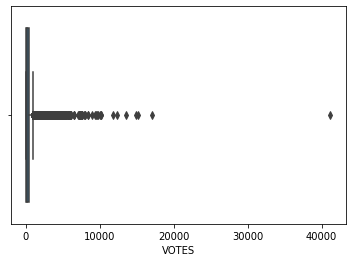

In [111]:
sns.boxplot(df['VOTES'])

In [112]:
import matplotlib.pyplot as plt

In [113]:
%matplotlib inline

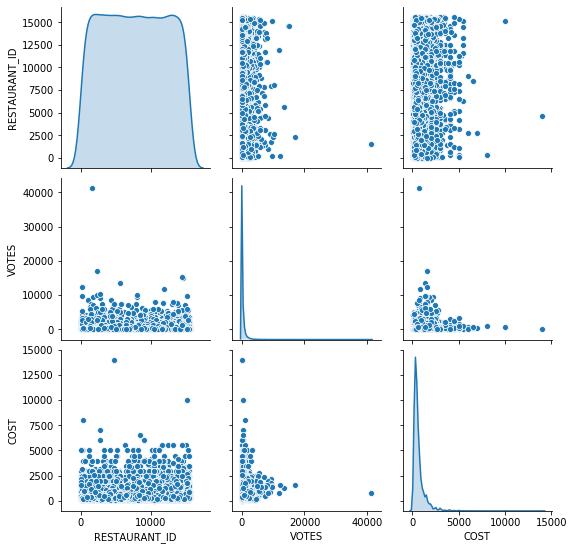

In [114]:
sns.pairplot(df,diag_kind='kde')

In [30]:
df.describe()

,RESTAURANT_ID,VOTES,COST
count,16895.000000,16895.000000,12665.000000
mean,7765.922344,379.391773,655.400790
std,4494.226728,808.915747,627.389831
min,0.000000,0.000000,20.000000
25%,3869.500000,40.000000,300.000000
50%,7750.000000,133.000000,500.000000
75%,11672.000000,409.000000,800.000000
max,15573.000000,41186.000000,14000.000000


In [115]:
import warnings

In [118]:
warnings.filterwarnings('ignore')

In [119]:
df['VOTES']=np.log(df['VOTES'])

In [120]:
df.replace([np.inf, -np.inf], np.nan,inplace=True)

In [121]:
df['VOTES'].fillna(value=0,inplace=True)

In [122]:
df.describe()

,RESTAURANT_ID,VOTES,COST
count,16895.000000,16895.000000,12665.000000
mean,7765.922344,4.596427,655.400790
std,4494.226728,2.020713,627.389831
min,0.000000,0.000000,20.000000
25%,3869.500000,3.688879,300.000000
50%,7750.000000,4.890349,500.000000
75%,11672.000000,6.013715,800.000000
max,15573.000000,10.625854,14000.000000


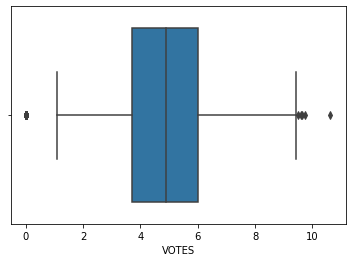

In [123]:
sns.boxplot(df['VOTES'])

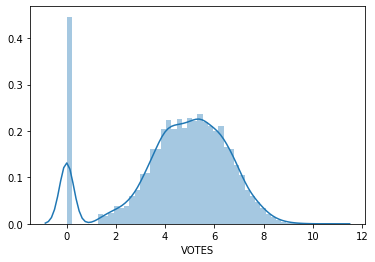

In [124]:
sns.distplot(df['VOTES'])

In [125]:
from sklearn.preprocessing import normalize

In [126]:
df['VOTES_NORM']=normalize(df[['VOTES']])

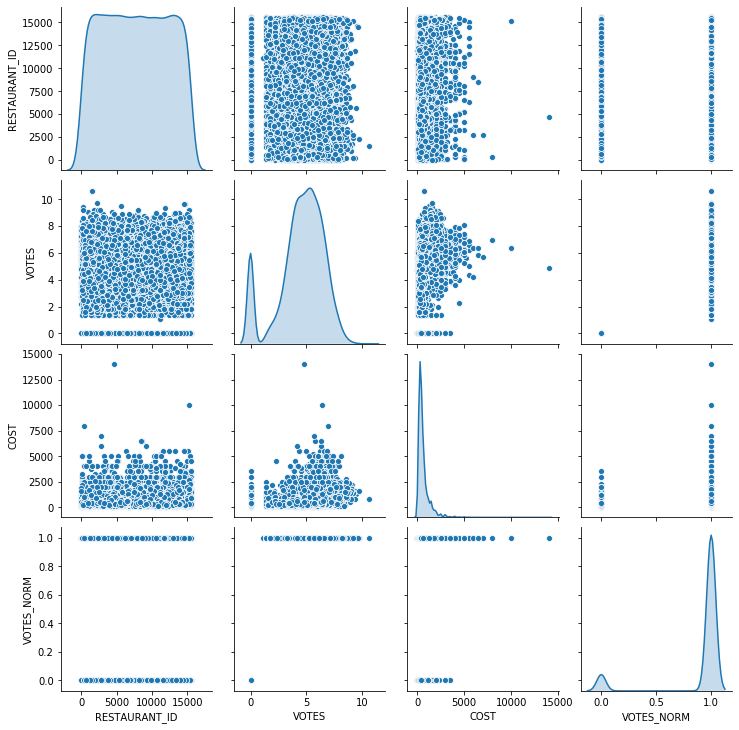

In [127]:
sns.pairplot(df,diag_kind='kde')

In [128]:
df['VOTES_PRO']=pd.cut(df['VOTES'],bins=5,labels=['very_low','low','medium','high','very_high'])

In [129]:
df['VOTES_PRO'].value_counts()

medium       7759
low          4199
high         2904
very_low     1964
very_high      69
Name: VOTES_PRO, dtype: int64

In [130]:
len(df[df['RATING']=='-'])

671

In [131]:
len(df[df['RATING']=='NEW'])

927

In [132]:
len(df[df['RATING']==np.nan])

0

In [133]:
df['RATING'].replace({'NEW': '3.7',np.nan:'0.0','-':'3.8'},inplace=True)

In [134]:
df['RATING']=df['RATING'].astype(np.float64)

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16895 entries, 0 to 4230
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   TITLE           16895 non-null  object  
 1   RESTAURANT_ID   16895 non-null  int64   
 2   CUISINES        16895 non-null  object  
 3   TIME            16895 non-null  object  
 4   CITY            16895 non-null  object  
 5   LOCALITY        16895 non-null  object  
 6   RATING          16895 non-null  float64 
 7   VOTES           16895 non-null  float64 
 8   COST            12665 non-null  float64 
 9   TOTAL_LOCATION  16895 non-null  object  
 10  VOTES_NORM      16895 non-null  float64 
 11  VOTES_PRO       16895 non-null  category
dtypes: category(1), float64(4), int64(1), object(6)
memory usage: 2.2+ MB


In [136]:
df.drop(columns={'RESTAURANT_ID'},inplace=True)

In [137]:
test_df=df[df['COST'].isnull()]

In [138]:
train_df=df[df['COST'].notnull()]

In [139]:
train_df.drop(columns={'CITY','LOCALITY'},inplace=True)

In [140]:
test_df.drop(columns={'CITY','LOCALITY'},inplace=True)

In [141]:
train_df.columns

Index(['TITLE', 'CUISINES', 'TIME', 'RATING', 'VOTES', 'COST',
       'TOTAL_LOCATION', 'VOTES_NORM', 'VOTES_PRO'],
      dtype='object')

In [142]:
train_df['TOTAL']=train_df['TITLE']+' '+train_df['CUISINES']+' '+train_df['TIME']+' '+train_df['TOTAL_LOCATION']

In [143]:
test_df['TOTAL']=test_df['TITLE']+' '+test_df['CUISINES']+' '+test_df['TIME']+' '+test_df['TOTAL_LOCATION']

In [144]:
train_df['TOTAL']=train_df['TOTAL'].str.lower()+' '+train_df['RATING'].astype(str)+' '+train_df['VOTES_PRO'].astype(str)

In [145]:
test_df['TOTAL']=test_df['TOTAL'].str.lower()+' '+test_df['RATING'].astype(str)+' '+test_df['VOTES_PRO'].astype(str)

In [146]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [147]:
cv=CountVectorizer(ngram_range=(1,2),stop_words='english')

In [148]:
counts=cv.fit_transform(train_df['TOTAL'])

In [149]:
tfid=TfidfTransformer(smooth_idf=False)

In [150]:
tfidf_train=tfid.fit_transform(counts)

In [151]:
test_counts=cv.transform(test_df['TOTAL'])

In [152]:
tfidf_test=tfid.transform(test_counts)

In [153]:
X=tfidf_train

In [154]:
y=train_df['COST']

In [155]:
from sklearn.model_selection import train_test_split

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=99)

In [157]:
from sklearn.metrics import mean_squared_error,mean_squared_log_error,r2_score

In [158]:
from sklearn.ensemble import RandomForestRegressor

In [159]:
rf=RandomForestRegressor(max_depth=20)

In [160]:
def model_sel(par,X_train,y_train,X_test,y_test):
    par.fit(X_train,y_train)

    train_pred=par.predict(X_train)

    test_pred=par.predict(X_test)

    from sklearn.metrics import mean_squared_error,mean_squared_log_error

    print("RMSE for train: ",np.sqrt(mean_squared_error(y_train,train_pred)))

    print("RMSE for test: ",np.sqrt(mean_squared_error(y_test,test_pred)))

    print("RMLSE for train: ",np.sqrt(mean_squared_log_error(y_train,train_pred)))
    print("R2 SCORE for train: ",r2_score(y_train,train_pred))
    print("R2 SCORE for test: ",r2_score(y_test,test_pred))

In [161]:
model_sel(rf,X_train,y_train,X_test,y_test)

RMSE for train:  167.01065527755256
RMSE for test:  292.64346817830403
RMLSE for train:  0.30588636547249615
R2 SCORE for train:  0.9312959073998635
R2 SCORE for test:  0.7651185974925425


In [216]:
result=rf.predict(tfidf_test)

In [217]:
result_df=pd.DataFrame(result)

In [218]:
result_df.rename(columns={0:'COST'},inplace=True)

In [202]:
result_df.to_excel('rfc_prediction.xlsx')

In [162]:
from sklearn.ensemble import AdaBoostRegressor

In [163]:
from sklearn.tree import DecisionTreeRegressor

In [164]:
ada=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(),n_estimators=100)

In [165]:
model_sel(ada,X_train,y_train,X_test,y_test)

RMSE for train:  18.115462852487155
RMSE for test:  295.98667614376006
RMLSE for train:  0.08050675278903852
R2 SCORE for train:  0.9991916617725791
R2 SCORE for test:  0.7597212938276534
